<a href="https://colab.research.google.com/github/kushal-h/Deep-Learning-Implementations/blob/master/basic_image_classification/Basic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""
@Author: Kushal H
"""
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.2.0'

Importing Fashion MNIST dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_lables), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_lables)

60000

In [10]:
train_lables

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

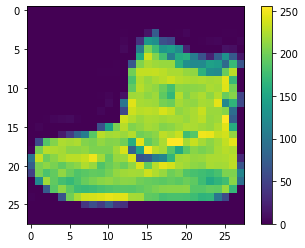

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images/255.0
test_images = test_images/255.0

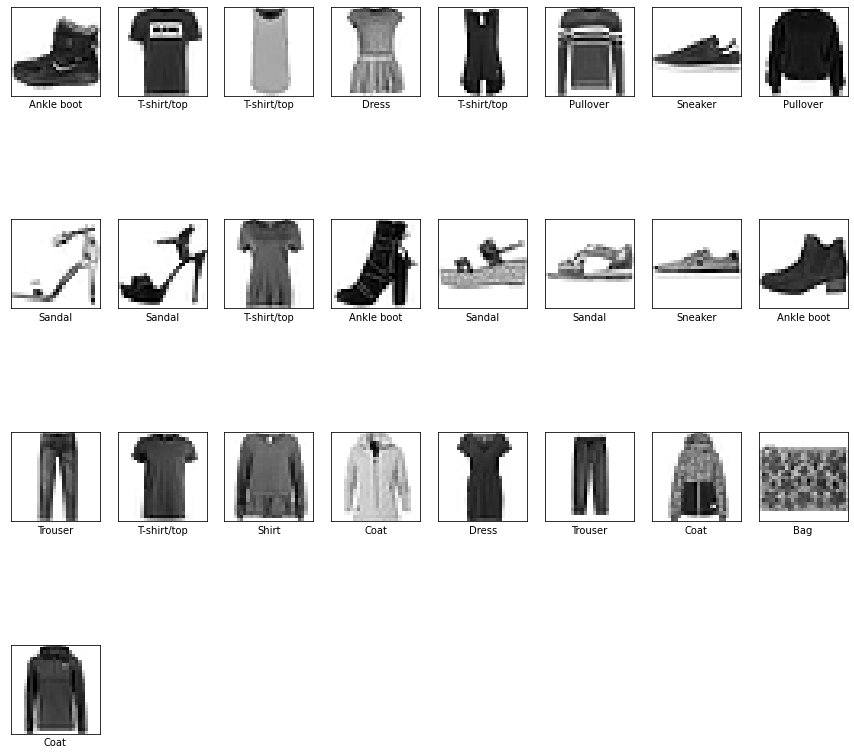

In [39]:
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(4,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_lables[i]])
plt.show() 

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation= 'relu'),
    keras.layers.Dense(10)                       

])

In [46]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics=['accuracy'])

In [47]:
model.fit(train_images, train_lables, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4948 - accuracy: 0.8273
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3128 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2966 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2806 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2679 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2479 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [49]:
test_loss, test_acc =  model.evaluate(test_images, test_labels, verbose =1)
print( '\n accuracy_test',test_acc )

313/313 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8801

 accuracy_test 0.8801000118255615


In [50]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [51]:
predictions = probability_model.predict(test_images)

In [52]:
predictions[0]

array([6.7851784e-06, 3.2138878e-08, 1.6439561e-06, 2.6043393e-08,
       1.7145019e-06, 9.5910823e-04, 3.7232292e-06, 2.8084753e-02,
       1.1402059e-07, 9.7094214e-01], dtype=float32)

In [53]:
np.argmax(predictions[0])

9

In [54]:
test_labels[0]

9